In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import date
from sklearn.preprocessing import MinMaxScaler

                 Open       High        Low      Close        Volume
Date                                                                
2022-06-03  146.45300  147.52000  144.02100  144.93800  8.884045e+07
2022-06-02  147.38100  150.81000  146.41300  150.75000  7.256873e+07
2022-06-01  149.44400  151.27900  147.23100  148.25800  7.451323e+07
2022-05-31  148.61600  150.20200  146.39300  148.38800  1.040348e+08
2022-05-27  144.94800  149.22400  144.81900  149.18500  9.125601e+07
...               ...        ...        ...        ...           ...
2010-01-08    6.40586    6.45421    6.36458    6.45401  5.246856e+08
2010-01-07    6.44444    6.45421    6.36409    6.41085  5.588893e+08
2010-01-06    6.52639    6.55241    6.41553    6.42221  6.452991e+08
2010-01-05    6.53905    6.56358    6.49230    6.52639  7.055130e+08
2010-01-04    6.49958    6.53008    6.46597    6.51522  5.764890e+08

[3127 rows x 5 columns]


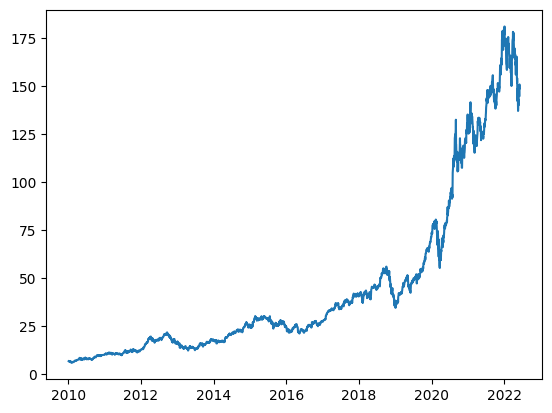

In [2]:
start ='2010-01-01'
end ='2022-6-3'

df=data.DataReader("AAPL", 'stooq', start, end)
#df=df.to_frame()
df.head()
#df2 = df.sort_values(by='Date', inplace = True) 
print(df)
#df.head()
#df=df.drop('Date', axis=1)
#df.head()
plt.plot(df.Close)

In [3]:
ma100=df.Close.rolling(100).mean()
print(ma100)

Date
2022-06-03         NaN
2022-06-02         NaN
2022-06-01         NaN
2022-05-31         NaN
2022-05-27         NaN
                ...   
2010-01-08    6.953343
2010-01-07    6.937091
2010-01-06    6.921914
2010-01-05    6.908978
2010-01-04    6.897006
Name: Close, Length: 3127, dtype: float64


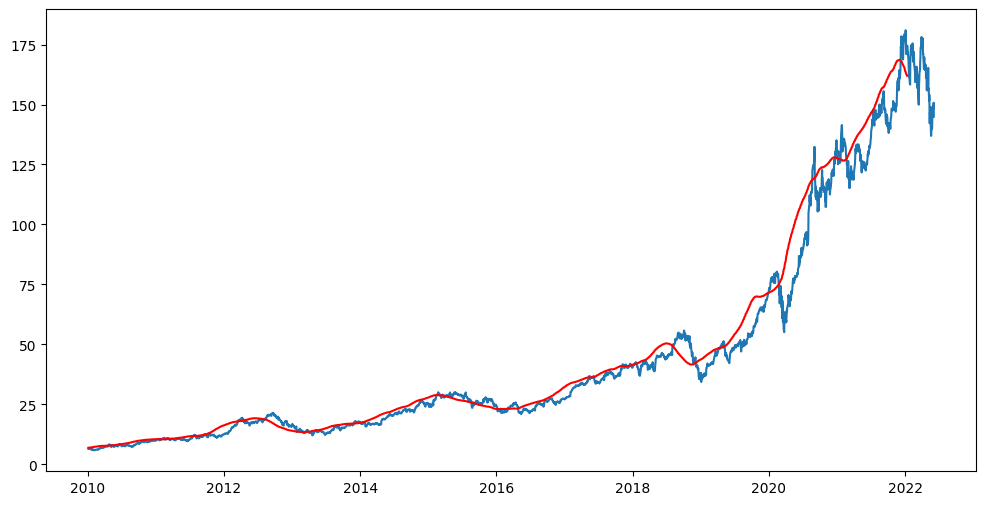

In [4]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [5]:
ma200=df.Close.rolling(200).mean()
print(ma200)

Date
2022-06-03         NaN
2022-06-02         NaN
2022-06-01         NaN
2022-05-31         NaN
2022-05-27         NaN
                ...   
2010-01-08    7.532251
2010-01-07    7.517503
2010-01-06    7.502498
2010-01-05    7.487859
2010-01-04    7.473319
Name: Close, Length: 3127, dtype: float64


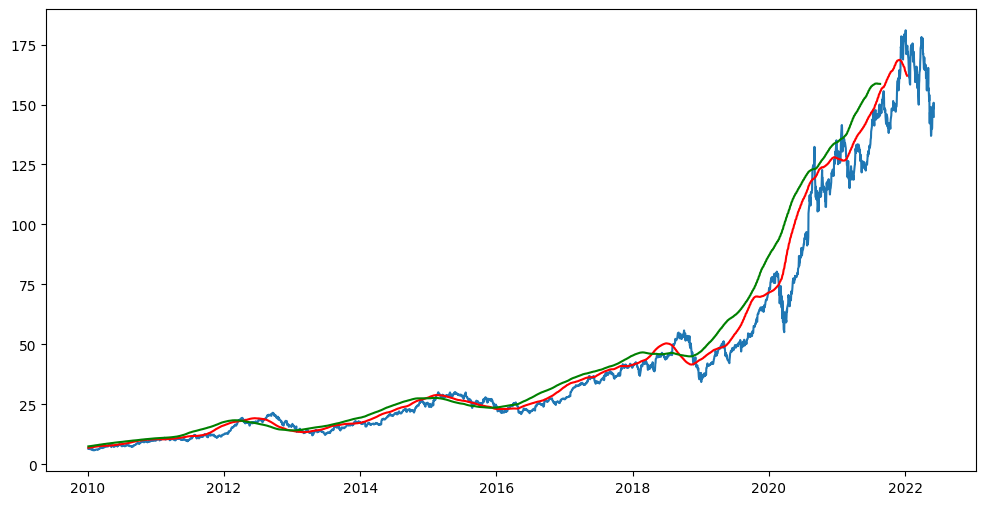

In [6]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [7]:
#Splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2188, 1)
(939, 1)


In [9]:
#import sklearn
scaler=MinMaxScaler(feature_range=(0,1))

In [10]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[7.82943793e-01],
       [8.17966855e-01],
       [8.02950084e-01],
       ...,
       [0.00000000e+00],
       [6.18869307e-04],
       [1.27329196e-03]])

In [12]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)

In [13]:
#ML Model

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model=Sequential()


model.add(LSTM(units=50, activation ='relu', return_sequences=True, input_shape=(x_train.shape[1],1) ))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation ='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation ='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation ='relu' ))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
66/66 [==============================] - 10s 91ms/step - loss: 0.0248
Epoch 2/50
66/66 [==============================] - 6s 90ms/step - loss: 0.0053
Epoch 3/50
66/66 [==============================] - 6s 86ms/step - loss: 0.0046
Epoch 4/50
66/66 [==============================] - 6s 86ms/step - loss: 0.0036
Epoch 5/50
66/66 [==============================] - 6s 89ms/step - loss: 0.0041
Epoch 6/50
66/66 [==============================] - 6s 90ms/step - loss: 0.0035
Epoch 7/50
66/66 [==============================] - 6s 90ms/step - loss: 0.0040
Epoch 8/50
66/66 [==============================] - 6s 88ms/step - loss: 0.0031
Epoch 9/50
66/66 [==============================] - 6s 89ms/step - loss: 0.0032
Epoch 10/50
66/66 [==============================] - 6s 92ms/step - loss: 0.0029
Epoch 11/50
66/66 [==============================] - 6s 90ms/step - loss: 0.0030
Epoch 12/50
66/66 [==============================] - 6s 93ms/step - loss: 0.0033
Epoch 13/50
66/66 [=================

In [24]:
model.save('keras_model.h5')

In [25]:
past_100days=data_training.tail(100)

In [28]:
final_df=past_100days.append(data_testing, ignore_index=True)

C:\Users\soham\AppData\Local\Temp\ipykernel_3068\157429354.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100days.append(data_testing, ignore_index=True)


In [29]:
final_df.head()

,Close
0,17.0201
1,17.2952
2,17.2314
3,17.2444
4,16.9732


In [32]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.71533986],
       [0.73295186],
       [0.72886736],
       ...,
       [0.03685908],
       [0.04352873],
       [0.04281362]])

In [34]:
input_data.shape

(1039, 1)

In [35]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [36]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(939, 100, 1)
(939,)


In [37]:
#Making predictions

y_predicted=model.predict(x_test)

30/30 [==============================] - 3s 23ms/step


In [38]:
y_predicted.shape

(939, 1)

In [39]:
y_test

array([5.90685805e-01, 6.05877838e-01, 6.08938011e-01, 5.62343990e-01,
       5.72177518e-01, 5.56991888e-01, 5.38099479e-01, 5.27753788e-01,
       5.57440031e-01, 5.73009783e-01, 5.62984194e-01, 6.16921350e-01,
       6.40090320e-01, 6.24066023e-01, 6.18259376e-01, 6.25026328e-01,
       6.04789491e-01, 6.07734428e-01, 6.11050683e-01, 6.09514194e-01,
       6.04789491e-01, 6.33707490e-01, 6.29751031e-01, 6.33707490e-01,
       6.32427082e-01, 6.29879072e-01, 6.43278534e-01, 6.32363062e-01,
       6.23425819e-01, 6.24642206e-01, 6.06774123e-01, 5.62215950e-01,
       5.36562990e-01, 5.49648752e-01, 5.51370900e-01, 5.51947083e-01,
       5.60372163e-01, 5.46582177e-01, 5.34962481e-01, 5.26607823e-01,
       5.28201930e-01, 5.17222438e-01, 5.03694935e-01, 4.98714151e-01,
       5.02670609e-01, 4.59783368e-01, 4.74399217e-01, 4.71716764e-01,
       4.85244266e-01, 4.82440175e-01, 4.82184093e-01, 4.76633528e-01,
       4.74840957e-01, 4.76313426e-01, 4.63355704e-01, 4.66543918e-01,
      

In [40]:
y_predicted

array([[0.60539365],
       [0.60282683],
       [0.6007918 ],
       [0.5993666 ],
       [0.5981146 ],
       [0.5967362 ],
       [0.5949448 ],
       [0.5924305 ],
       [0.58896774],
       [0.5847941 ],
       [0.58040524],
       [0.5761669 ],
       [0.57283777],
       [0.57120866],
       [0.57157266],
       [0.57376873],
       [0.5774627 ],
       [0.5820007 ],
       [0.586785  ],
       [0.5913913 ],
       [0.5955324 ],
       [0.5990039 ],
       [0.6020184 ],
       [0.6047785 ],
       [0.60746104],
       [0.6101453 ],
       [0.6128046 ],
       [0.6155181 ],
       [0.6182029 ],
       [0.62064815],
       [0.6226943 ],
       [0.6240663 ],
       [0.6242022 ],
       [0.6225797 ],
       [0.61911976],
       [0.6140776 ],
       [0.60787666],
       [0.6010625 ],
       [0.5940184 ],
       [0.5869464 ],
       [0.5799312 ],
       [0.5730672 ],
       [0.5663166 ],
       [0.5595784 ],
       [0.5527722 ],
       [0.54593986],
       [0.5388645 ],
       [0.531

In [41]:
scaler.scale_

array([0.06402036])

In [42]:
scale_factor=1/0.06402036
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

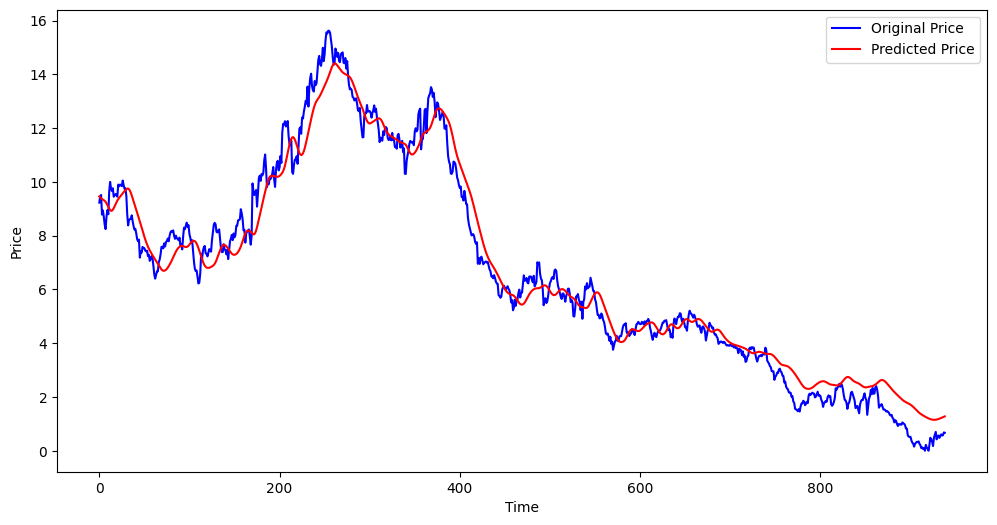

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()